# [[데이콘] 손동작 분류 경진대회](https://dacon.io/competitions/official/235876/data)

## 1. Load packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 2. Data loading

In [2]:
train = pd.read_csv('data/손동작 분류 경진대회/train.csv')
test = pd.read_csv('data/손동작 분류 경진대회/test.csv')
submission= pd.read_csv('data/손동작 분류 경진대회/sample_submission.csv')

In [3]:
train.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [4]:
test.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


## 3. Preprocessing

### 1) 데이터 정보 확인

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2335 non-null   int64  
 1   sensor_1   2335 non-null   float64
 2   sensor_2   2335 non-null   float64
 3   sensor_3   2335 non-null   float64
 4   sensor_4   2335 non-null   float64
 5   sensor_5   2335 non-null   float64
 6   sensor_6   2335 non-null   float64
 7   sensor_7   2335 non-null   float64
 8   sensor_8   2335 non-null   float64
 9   sensor_9   2335 non-null   float64
 10  sensor_10  2335 non-null   float64
 11  sensor_11  2335 non-null   float64
 12  sensor_12  2335 non-null   float64
 13  sensor_13  2335 non-null   float64
 14  sensor_14  2335 non-null   float64
 15  sensor_15  2335 non-null   float64
 16  sensor_16  2335 non-null   float64
 17  sensor_17  2335 non-null   float64
 18  sensor_18  2335 non-null   float64
 19  sensor_19  2335 non-null   float64
 20  sensor_2

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9343 non-null   int64  
 1   sensor_1   9343 non-null   float64
 2   sensor_2   9343 non-null   float64
 3   sensor_3   9343 non-null   float64
 4   sensor_4   9343 non-null   float64
 5   sensor_5   9343 non-null   float64
 6   sensor_6   9343 non-null   float64
 7   sensor_7   9343 non-null   float64
 8   sensor_8   9343 non-null   float64
 9   sensor_9   9343 non-null   float64
 10  sensor_10  9343 non-null   float64
 11  sensor_11  9343 non-null   float64
 12  sensor_12  9343 non-null   float64
 13  sensor_13  9343 non-null   float64
 14  sensor_14  9343 non-null   float64
 15  sensor_15  9343 non-null   float64
 16  sensor_16  9343 non-null   float64
 17  sensor_17  9343 non-null   float64
 18  sensor_18  9343 non-null   float64
 19  sensor_19  9343 non-null   float64
 20  sensor_2

In [79]:
train.isna().sum()

id           0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
target       0
dtype: int64

In [80]:
test.isna().sum()

id           0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
dtype: int64

In [81]:
# target 변수 빈도, 비율 확인
train['target'].value_counts(), train['target'].value_counts(normalize=True)

(3    599
 2    593
 1    574
 0    569
 Name: target, dtype: int64,
 3    0.256531
 2    0.253961
 1    0.245824
 0    0.243683
 Name: target, dtype: float64)

In [82]:
# train 기초통계량
train.iloc[:, 1:-1].describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,0.027448,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,26.671928,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-93.171275,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-14.102903,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-1.104314,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,12.137937,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,121.959404,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621


### 2) train 데이터 상관계수 히트맵

In [23]:
train_corr_df = train.iloc[:, 1:-1].corr()
train_corr_df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
sensor_1,1.000000,0.089510,-0.014863,0.133260,-0.165601,-0.006924,-0.007083,-0.053089,-0.118079,-0.007037,...,-0.016110,-0.010171,0.071318,-0.011804,0.030132,0.023672,-0.017004,0.022611,0.016690,-0.018652
sensor_2,0.089510,1.000000,0.068790,0.056505,-0.049662,-0.224370,-0.095890,-0.086786,-0.024404,-0.105747,...,0.035841,0.011006,-0.022192,0.054226,-0.027150,-0.023783,-0.025482,0.029349,-0.003469,-0.003848
sensor_3,-0.014863,0.068790,1.000000,0.126943,-0.014903,-0.023781,-0.334553,-0.082429,0.000044,0.046458,...,0.145320,0.028667,-0.004696,-0.000893,0.053824,0.028311,-0.014705,-0.002757,-0.037151,-0.043985
sensor_4,0.133260,0.056505,0.126943,1.000000,-0.007616,-0.010205,-0.012062,-0.370512,-0.015410,0.005685,...,-0.012626,0.056225,0.025614,-0.014996,0.034144,0.120834,0.029611,0.066494,0.000102,-0.064024
sensor_5,-0.165601,-0.049662,-0.014903,-0.007616,1.000000,0.107861,-0.023523,0.081025,-0.304084,-0.020070,...,-0.005123,-0.006828,0.139866,0.010908,-0.023287,-0.006755,0.052307,-0.004195,0.005234,-0.021886
sensor_6,-0.006924,-0.224370,-0.023781,-0.010205,0.107861,1.000000,0.065052,0.081256,-0.059777,-0.249453,...,0.006216,-0.004817,-0.006579,0.127302,0.007731,0.030834,0.028890,0.086592,-0.077735,-0.072532
sensor_7,-0.007083,-0.095890,-0.334553,-0.012062,-0.023523,0.065052,1.000000,0.156873,0.029191,0.032958,...,-0.170088,-0.059657,-0.009377,-0.043034,0.106018,0.026686,0.008321,-0.006077,0.061930,0.065185
sensor_8,-0.053089,-0.086786,-0.082429,-0.370512,0.081025,0.081256,0.156873,1.000000,0.024731,0.007526,...,-0.023205,-0.108725,-0.002681,-0.037382,0.020659,0.059422,0.009128,-0.020435,0.014344,0.092971
sensor_9,-0.118079,-0.024404,0.000044,-0.015410,-0.304084,-0.059777,0.029191,0.024731,1.000000,0.092615,...,-0.007722,-0.025909,-0.163510,0.013563,-0.005544,-0.001884,0.126576,-0.018774,0.009564,0.065943
sensor_10,-0.007037,-0.105747,0.046458,0.005685,-0.020070,-0.249453,0.032958,0.007526,0.092615,1.000000,...,-0.007475,0.043512,0.019758,-0.216969,0.049649,-0.028677,0.020926,0.103457,0.024762,0.046318


<ipython-input-28-4d077f2ef241>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train_corr_df, dtype=np.bool)


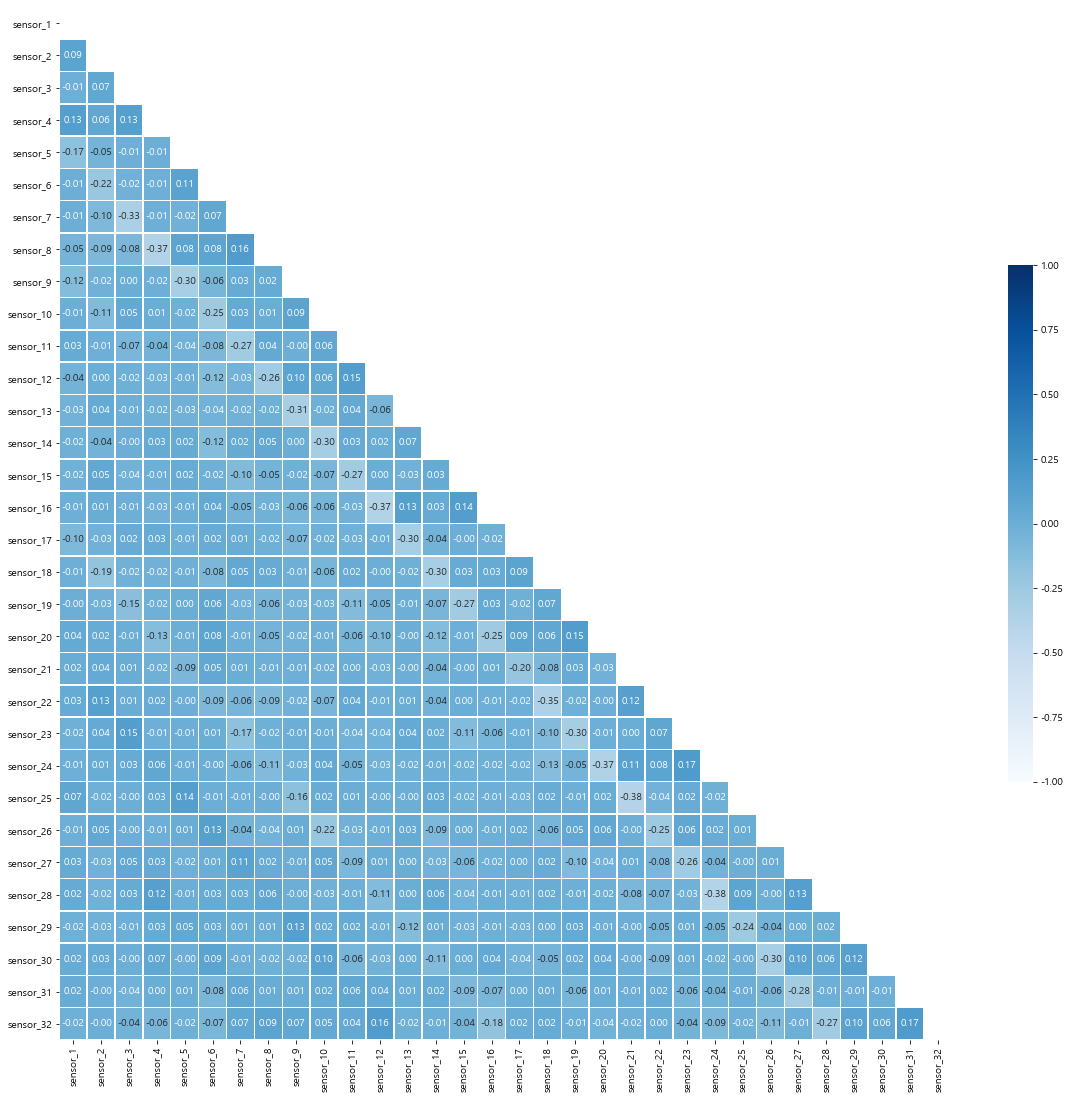

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 19)

# 삼각형 마스크 생성(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(train_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_corr_df, 
            cmap = 'Blues', 
            annot = True,   # 실제 값을 표시한다
            fmt = '.2f', # 소수점 지정
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 3) test 데이터 상관계수 히트맵

In [33]:
test.head(0)

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32


In [35]:
test_corr_df = test.iloc[:,1:].corr()
test_corr_df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
sensor_1,1.000000,0.086154,-0.019672,0.073564,-0.302695,-0.046535,-0.011218,-0.012735,-0.054792,0.009372,...,0.014399,0.026756,0.034728,0.006167,0.015108,0.003437,-0.001812,-0.013947,-0.011962,-0.001289
sensor_2,0.086154,1.000000,0.060789,0.036809,-0.054495,-0.293306,-0.072462,-0.031149,0.026810,-0.096360,...,-0.006289,0.019097,0.005324,0.076347,-0.002900,-0.009918,0.009380,-0.029957,-0.000651,-0.004139
sensor_3,-0.019672,0.060789,1.000000,0.119450,-0.000080,0.012465,-0.293827,-0.041765,0.008062,0.012099,...,0.083832,0.021307,-0.008456,0.020340,0.051399,0.020663,-0.014434,0.004458,-0.014484,-0.028506
sensor_4,0.073564,0.036809,0.119450,1.000000,-0.027342,0.029262,-0.023005,-0.326806,-0.003925,0.008172,...,0.014927,0.048830,-0.005373,0.014306,0.007148,0.066400,-0.008418,-0.013364,-0.000104,-0.025739
sensor_5,-0.302695,-0.054495,-0.000080,-0.027342,1.000000,0.069019,-0.007923,0.087932,-0.266411,0.001768,...,0.009396,0.002025,0.133647,0.002859,-0.021348,0.014517,0.056828,-0.006797,0.001301,-0.000807
sensor_6,-0.046535,-0.293306,0.012465,0.029262,0.069019,1.000000,0.065006,0.027733,-0.039499,-0.255847,...,0.017497,-0.007314,-0.004548,0.100846,-0.005918,0.007904,-0.004262,0.083401,-0.008066,-0.018066
sensor_7,-0.011218,-0.072462,-0.293827,-0.023005,-0.007923,0.065006,1.000000,0.144354,-0.002135,0.007155,...,-0.114989,-0.001259,0.011192,-0.019151,0.085693,0.006781,-0.008023,0.006176,0.048477,0.015935
sensor_8,-0.012735,-0.031149,-0.041765,-0.326806,0.087932,0.027733,0.144354,1.000000,-0.029698,0.019704,...,-0.044114,-0.084194,0.024665,-0.040724,0.030046,0.078704,0.009852,0.006497,0.023744,0.059088
sensor_9,-0.054792,0.026810,0.008062,-0.003925,-0.266411,-0.039499,-0.002135,-0.029698,1.000000,0.039114,...,-0.005404,-0.005010,-0.122886,-0.018668,0.019161,-0.015261,0.117130,-0.001710,-0.006038,0.014893
sensor_10,0.009372,-0.096360,0.012099,0.008172,0.001768,-0.255847,0.007155,0.019704,0.039114,1.000000,...,-0.001563,0.030544,0.008849,-0.126845,0.014834,0.018770,-0.008512,0.077965,0.003201,0.010939


<ipython-input-36-3492f6c6a611>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(test_corr_df, dtype=np.bool)


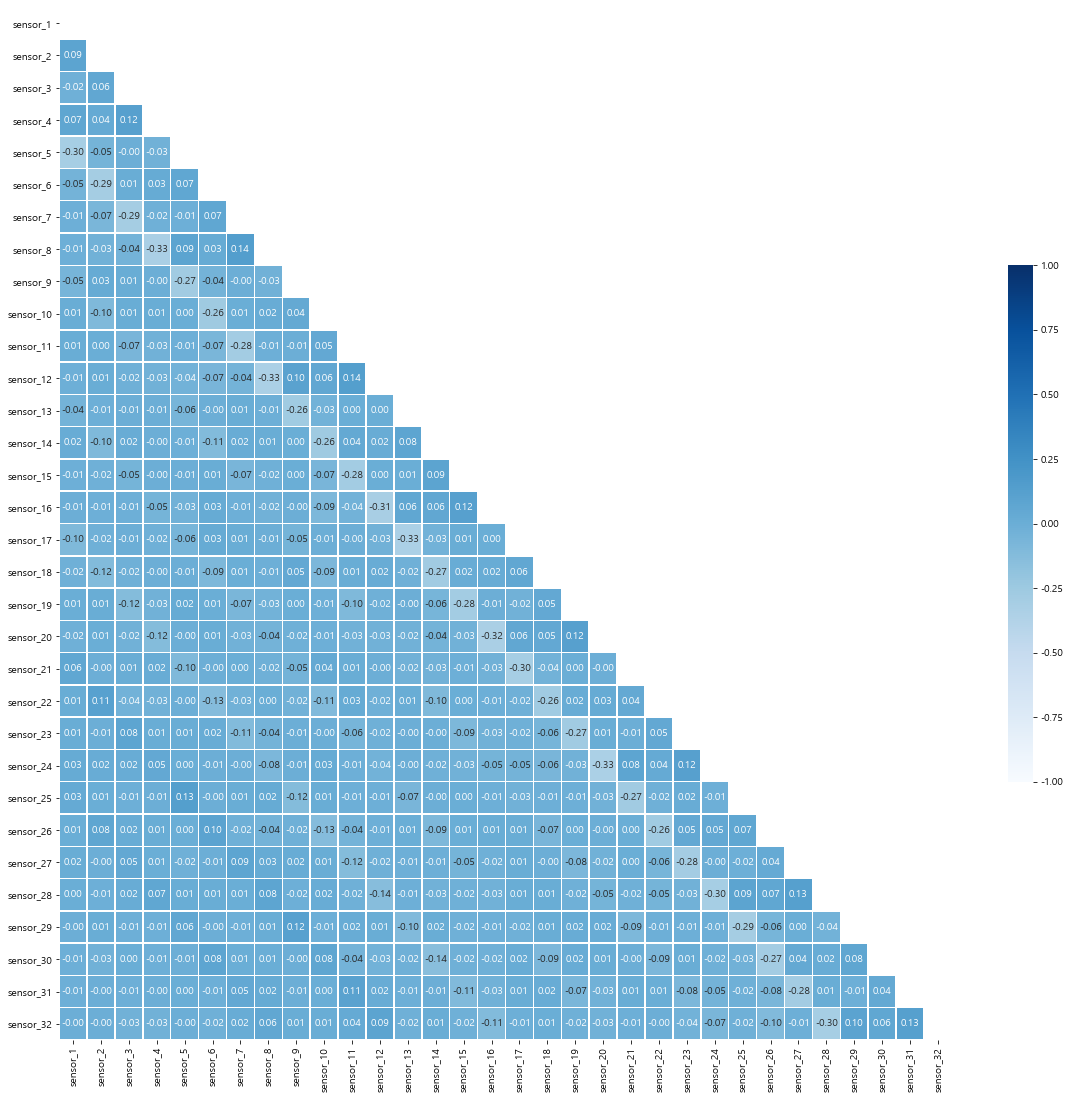

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 19)

# 삼각형 마스크 생성(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(test_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(test_corr_df, 
            cmap = 'Blues', 
            annot = True,   # 실제 값을 표시한다
            fmt = '.2f', # 소수점 지정
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 4) 각 변수별 시각화

In [69]:
col_list = train.columns[1:-1].tolist()
col_list = np.array(col_list).reshape(4,8)
print(col_list)

[['sensor_1' 'sensor_2' 'sensor_3' 'sensor_4' 'sensor_5' 'sensor_6'
  'sensor_7' 'sensor_8']
 ['sensor_9' 'sensor_10' 'sensor_11' 'sensor_12' 'sensor_13' 'sensor_14'
  'sensor_15' 'sensor_16']
 ['sensor_17' 'sensor_18' 'sensor_19' 'sensor_20' 'sensor_21' 'sensor_22'
  'sensor_23' 'sensor_24']
 ['sensor_25' 'sensor_26' 'sensor_27' 'sensor_28' 'sensor_29' 'sensor_30'
  'sensor_31' 'sensor_32']]


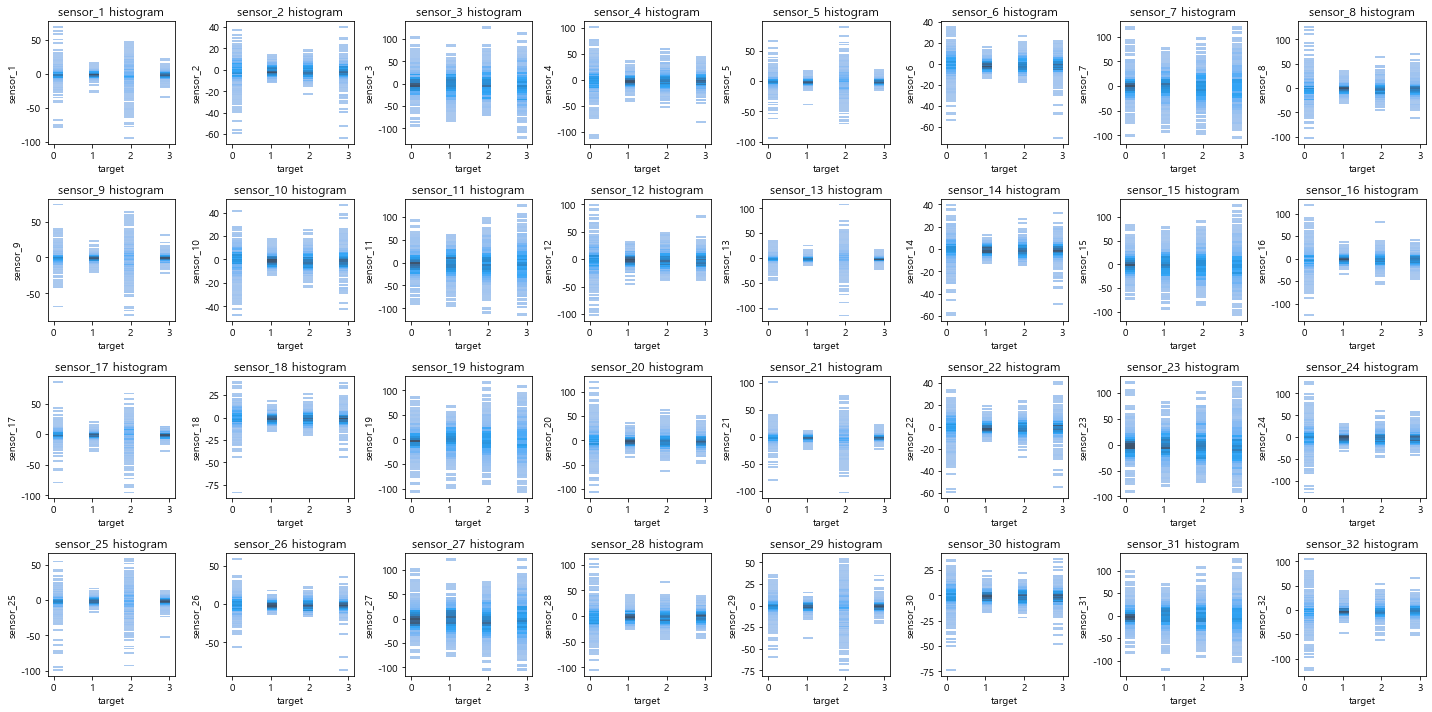

In [72]:
fig, ax = plt.subplots(nrows = 4, ncols = 8)
fig.set_size_inches(20, 10)

for i in range(4):
    for j in range(8):
        sns.histplot(data=train, x = 'target', y = col_list[i, j], ax=ax[i,j])
        ax[i,j].set(title = f'{col_list[i,j]} histogram')

plt.tight_layout()
plt.show()

위의 방식으로 화면 분할을 하기보다는 아래의 *plt.subplot()* 을 이용한 방식이 더 편하다.

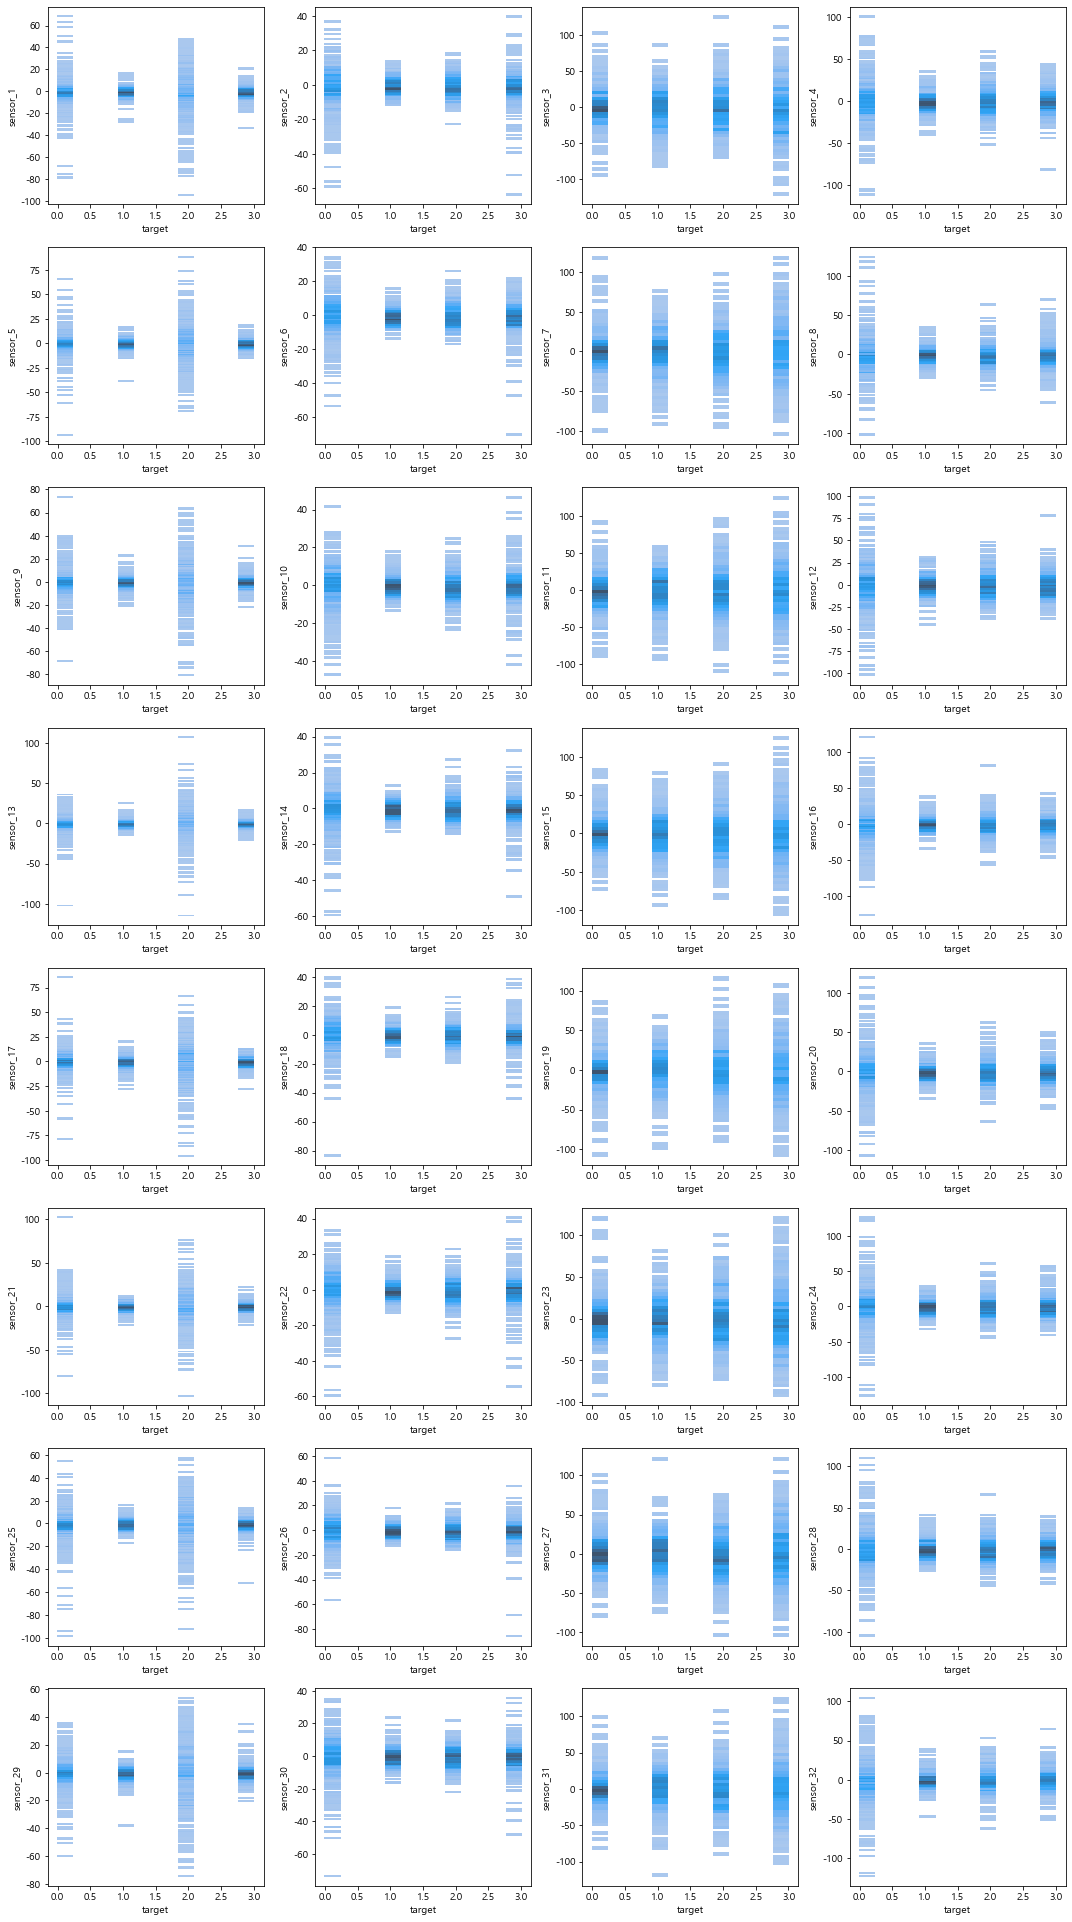

In [76]:
target = 'target'
feature = train.columns[1:-1]

plt.figure(figsize = (15, 40))

for i in range(len(feature)):
    plt.subplot(8, 4, i+1)
    plt.xlabel('target')
    plt.ylabel(feature[i])
    sns.histplot(data=train, x = train[target], y = train[feature[i]])
plt.tight_layout(rect=[0, 0.03, 1, 0.7]) # left, bottom, rightm top
plt.show()

### 5) Target과 다른 feature들과의 관계

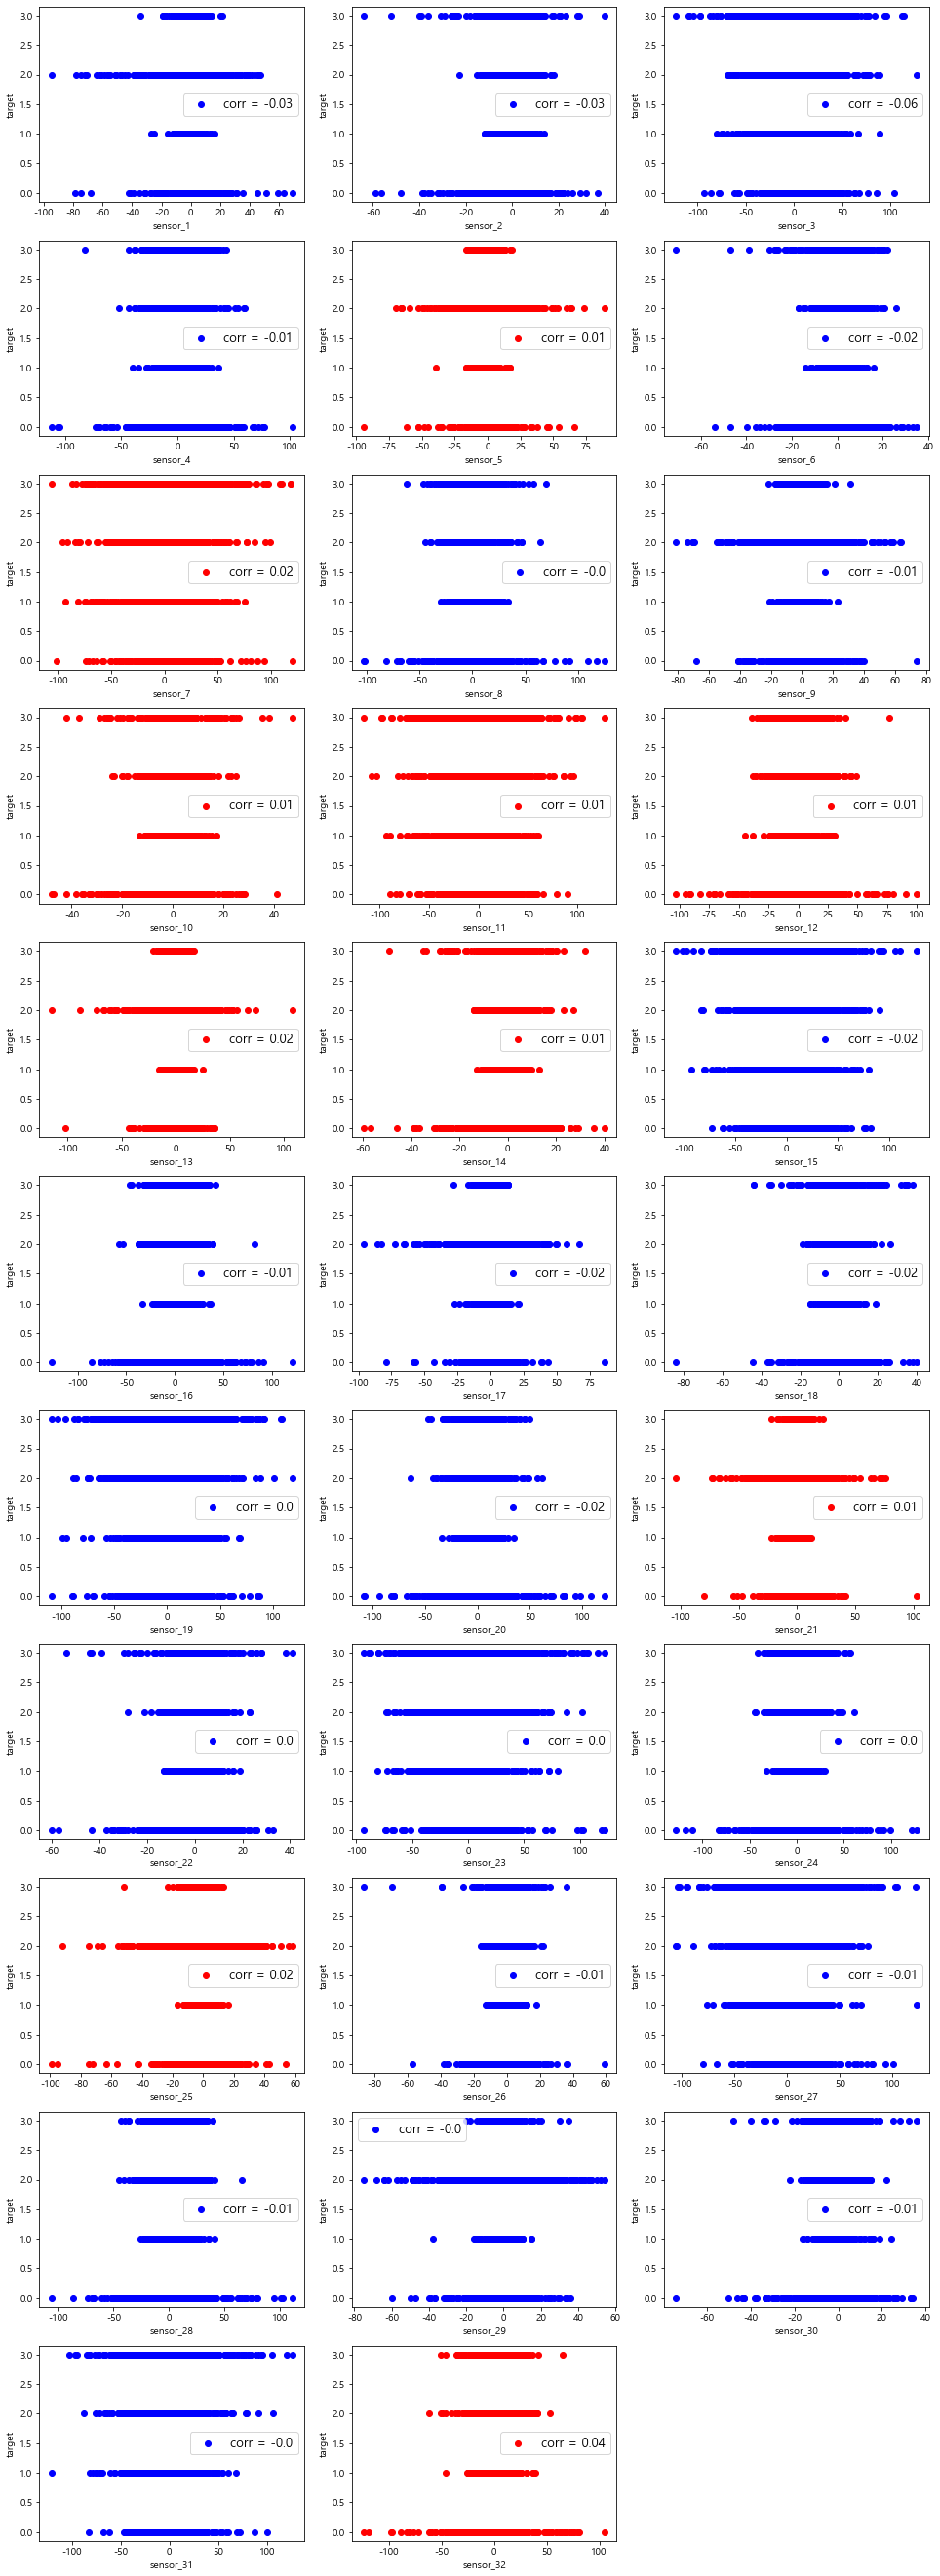

In [5]:
target = "target"
feature = train.columns[1:-1]

plt.figure(figsize=(15,40))

# id는 제외하고 시각화
for i in range(len(feature)):
    plt.subplot(11,3,i+1) # rows, columns, index
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue' # 양수 → red, 음수 → blue
    plt.scatter(train[feature[i]], train[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=13)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95]) # tuple(left, bottom, right, top), 기본값(0,0,1,1)
plt.show()

## 4-1). Modeling(LightGBM)
[LightGBM 소개](https://velog.io/@sset2323/04-07.-LightGBM)

In [6]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

### (1) train data split

In [8]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

In [9]:
X_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846


In [10]:
y_train.head()

0    1
1    1
2    0
3    1
4    2
Name: target, dtype: int64

In [11]:
y_train.value_counts(), y_train.value_counts(normalize=True)

(3    599
 2    593
 1    574
 0    569
 Name: target, dtype: int64,
 3    0.256531
 2    0.253961
 1    0.245824
 0    0.243683
 Name: target, dtype: float64)

### (2) Model

In [21]:
# 모델 생성
lgb_model = lgb.LGBMClassifier()

# 모델 학습
lgb_model.fit(X_train, y_train)

# 예측 값 확인
y_pred = lgb_model.predict(X_train)

# 모델 평가
print('학습 데이터 평가: {}'.format(accuracy_score(y_train, y_pred)))

학습 데이터 평가: 1.0


### (3) y_test 값 예측

In [22]:
X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


## 5. Submission

In [128]:
# submission 데이터 셋 복사
LightLGBM = submission.copy()
LightLGBM.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [129]:
# 예측 값을 LightLGBM에 대입
LightLGBM['target'] = lgb_model.predict(X_test)
LightLGBM.head()

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2


In [130]:
LightLGBM.target.value_counts(), LightLGBM.target.value_counts(normalize=True)

(2    2552
 1    2409
 0    2213
 3    2169
 Name: target, dtype: int64,
 2    0.273146
 1    0.257840
 0    0.236862
 3    0.232152
 Name: target, dtype: float64)

In [131]:
# LightLGBM.to_csv('data/손동작 분류 경진대회/01.LightLGBM.csv', index = False)

---

## 4-2) Modeling(LightGBM + Scaling + GridSearchCV)

### (1) train data split

In [7]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


### (2) Scaling

[fit & transform 과 fit_transform의 차이](https://www.inflearn.com/questions/19038)

In [20]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

X_train_s = s_scaler.fit_transform(X_train)
X_test_s = s_scaler.transform(X_test)

X_train_m = m_scaler.fit_transform(X_train)
X_test_m = m_scaler.transform(X_test)

### (3) Model

In [21]:
# 모델 생성
lgb_model_s = lgb.LGBMClassifier()
lgb_model_m = lgb.LGBMClassifier()

# 모델 학습
lgb_model_s.fit(X_train_s, y_train)
lgb_model_m.fit(X_train_m, y_train)

# 예측 값 확인
y_pred_s = lgb_model_s.predict(X_train_s)
y_pred_m = lgb_model_m.predict(X_train_m)

# 모델 평가
print('StandardScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_s)))
print('MinMaxScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_m)))

StandardScaler 학습 데이터 점수: 1.0
MinMaxScaler 학습 데이터 점수: 1.0


### (4) GridSearchCV

In [28]:
pipeline_s = Pipeline([('scaler', StandardScaler()),
                   ('model', lgb.LGBMClassifier())])

pipeline_m = Pipeline([('scaler', MinMaxScaler()),
                   ('model', lgb.LGBMClassifier())])

param_grid = {'model__learning_rate': [0.05, 0.1, 0.2],
             'model__max_depth': [3, 5, 7],
             'model__min_child_sample': [10, 20, 30]}

gs_s = GridSearchCV(estimator=pipeline_s, param_grid=param_grid, cv=5, n_jobs=-1)
gs_m = GridSearchCV(estimator=pipeline_m, param_grid=param_grid, cv=5, n_jobs=-1)

result_s = gs_s.fit(X_train, y_train)
result_m = gs_m.fit(X_train, y_train)

print('StandardScaler 적용')
print('최적 파라미터: {}'.format(gs_s.best_params_))
print('최적 점수: {}'.format(gs_s.best_score_))
print(result_s.best_estimator_)

print('/nMinMaxScaler 적용')
print('최적 파라미터: {}'.format(gs_m.best_params_))
print('최적 점수: {}'.format(gs_m.best_score_))
print(result_m.best_estimator_)

[LightGBM] [Warning] Unknown parameter: min_child_sample
최적 파라미터: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__min_child_sample': 10}
최적 점수: 0.812847965738758
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LGBMClassifier(learning_rate=0.2, max_depth=7,
                                min_child_sample=10))])
최적 파라미터: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__min_child_sample': 10}
최적 점수: 0.8102783725910063
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LGBMClassifier(learning_rate=0.2, max_depth=7,
                                min_child_sample=10))])


둘 다 비슷한 성능을 보이지만 간소한 차이로 StandardScaler를 이용한 모델의 성능이 더 좋음

In [29]:
# 모델 생성
lgb_model = result_m.best_estimator_

# 예측값 생성
y_preds = lgb_model.predict(X_test)
y_preds

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

## 5. Submission

In [32]:
# 예측 y값 제출 데이터에 입력
LightLGBM_gs = submission.copy()
LightLGBM_gs['target'] = y_preds
print(LightLGBM_gs.head())

# 제출 데이터 저장
# LightLGBM_gs.to_csv('data/손동작 분류 경진대회/02.LightLGBM_gs.csv', index=False)

   id  target
0   1       0
1   2       0
2   3       1
3   4       3
4   5       2


---
## 4-3) Modeling(SVM)

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

### (1) train data split

In [13]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

In [14]:
X_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846


In [15]:
y_train.head()

0    1
1    1
2    0
3    1
4    2
Name: target, dtype: int64

### (2) Model

In [17]:
# 모델 생성
svc_model = SVC()

# 모델 학습
svc_model.fit(X_train, y_train)

# 예측 값 확인
y_pred = svc_model.predict(X_train)

# 모델 평가
print('학습 데이터 평가: {}'.format(accuracy_score(y_train, y_pred)))

학습 데이터 평가: 0.8573875802997859


### (3) y_test 값 예측

In [18]:
X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


## 5. Submission

In [19]:
# submission 데이터 셋 복사
svc = submission.copy()
svc.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [20]:
# 예측 값을 LightLGBM에 대입
svc['target'] = svc_model.predict(X_test)
svc.head()

,id,target
0,1,0
1,2,0
2,3,1
3,4,1
4,5,2


In [21]:
svc.target.value_counts(), svc.target.value_counts(normalize=True)

(1    3212
 3    2252
 0    2065
 2    1814
 Name: target, dtype: int64,
 1    0.343787
 3    0.241036
 0    0.221021
 2    0.194156
 Name: target, dtype: float64)

In [22]:
# svc.to_csv('data/손동작 분류 경진대회/03.svc.csv', index = False)

---
## 4-4) Modeling(SVC + Scaling + GridSearchCV)

### (1) train data split

In [23]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


### (2) Scaling

[fit & transform 과 fit_transform의 차이](https://www.inflearn.com/questions/19038)

In [24]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

X_train_s = s_scaler.fit_transform(X_train)
X_test_s = s_scaler.transform(X_test)

X_train_m = m_scaler.fit_transform(X_train)
X_test_m = m_scaler.transform(X_test)

### (3) Model

In [25]:
# 모델 생성
svc_model_s = SVC()
svc_model_m = SVC()

# 모델 학습
svc_model_s.fit(X_train_s, y_train)
svc_model_m.fit(X_train_m, y_train)

# 예측 값 확인
y_pred_s = svc_model_s.predict(X_train_s)
y_pred_m = svc_model_m.predict(X_train_m)

# 모델 평가
print('StandardScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_s)))
print('MinMaxScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_m)))

StandardScaler 학습 데이터 점수: 0.8822269807280514
MinMaxScaler 학습 데이터 점수: 0.8184154175588865


학습 데이터 평가 결과, StandardScaler 인 경우의 점수가 더 높다.

### (4) GridSearchCV

In [29]:
pipeline = Pipeline([('scaler', StandardScaler()),
                   ('model', SVC())])

## 비대칭 매개변수 그리드 탐색
# param_grid = [{'model__kernel':['ploy', 'rbf', 'sigmoid'],  # 가장 성능이 좋은 것: 가우시안 RBF 커널
#               'model__C':[3, 5, 7], # 값이 클수록 이상치의 존재 가능성을 작게 봐서 좀 더 세심하게 결정 경계를 찾아낸다. -> 오버피팅(하드마진)
#               'model__gamma':[0.01, 0.1, 1, 10]}, # 값이 클수록 결정 경계의 곡률이 커짐 -> 오버피팅
#              {'model__kernel':['linear'],
#               'model__C':[3, 5, 7]}]

param_grid = [ {'model__kernel': ['rbf', 'ploy', 'sigmoid'], # 가장 성능이 좋은 것: 가우시안 RBF 커널
             'model__C': [10 ,20 ,30], # 값이 클수록 이상치의 존재 가능성을 작게 봐서 좀 더 세심하게 결정 경계를 찾아낸다. -> 오버피팅(하드마진)
             'model__gamma': [0.01, 0.1, 1, 10]},  # 값이 클수록 결정 경계의 곡률이 커짐 -> 오버피팅
             {'model__kernel': ['linear'],
              'model__C': [10 ,20 ,30]
             } ]

gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

result = gs.fit(X_train, y_train)

print('StandardScaler 적용')
print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {}'.format(gs.best_score_))
print(result.best_estimator_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.76830835        nan 0.26509636 0.73147752        nan 0.15888651
 0.29593148        nan 0.15546039 0.25653105        nan 0.16102784
 0.78586724        nan 0.25781585 0.73147752        nan 0.1614561
 0.29593148        nan 0.15760171 0.25653105        nan 0.1640257
 0.78458244        nan 0.24068522 0.73147752        nan 0.15802998
 0.29593148        nan 0.16102784 0.25653105        nan 0.16359743
 0.30706638 0.30492505 0.30706638]
  warnings.warn(


StandardScaler 적용
최적 파라미터: {'model__C': 20, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
최적 점수: 0.7858672376873662
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=20, gamma=0.01))])


In [31]:
# 모델 생성
svc_model = result.best_estimator_

# 예측값 생성
y_preds = svc_model.predict(X_test)
y_preds

array([0, 0, 1, ..., 0, 0, 3], dtype=int64)

## 5. Submission

In [32]:
# 예측 y값 제출 데이터에 입력
svc_gs = submission.copy()
svc_gs['target'] = y_preds
print(svc_gs.head())

# 제출 데이터 저장
svc_gs.to_csv('data/손동작 분류 경진대회/04.svc_gs.csv', index=False)

   id  target
0   1       0
1   2       0
2   3       1
3   4       3
4   5       2


---
## 4-5) Modeling(RandomForest)
[참고](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest%EC%99%80-%EC%95%99%EC%83%81%EB%B8%94Ensemble)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### (1) train data split

In [9]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

### (2) Model

In [14]:
# 모델 생성
rfc_model = RandomForestClassifier()

# 모델 학습
rfc_model.fit(X_train, y_train)

# 예측 값 확인
y_pred = rfc_model.predict(X_train)

# 모델 평가
print('학습 데이터 평가: {}'.format(accuracy_score(y_train, y_pred)))

학습 데이터 평가: 1.0


### (3) y_test 값 예측

In [15]:
X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


## 5. Submission

In [16]:
# submission 데이터 셋 복사
randomforest = submission.copy()
randomforest.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [17]:
# 예측 값을 LightLGBM에 대입
randomforest['target'] = rfc_model.predict(X_test)
randomforest.head()

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2


In [18]:
randomforest.target.value_counts(), randomforest.target.value_counts(normalize=True)

(2    2857
 1    2275
 0    2185
 3    2026
 Name: target, dtype: int64,
 2    0.305790
 1    0.243498
 0    0.233865
 3    0.216847
 Name: target, dtype: float64)

In [19]:
# randomforest.to_csv('data/손동작 분류 경진대회/05.randomforest.csv', index = False)

---
## 4-6) Modeling(RandomForest + Sacling + GridSearchV)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

### (1) train data split

In [21]:
X_train = train.iloc[:, 1:-1]
y_train = train.target

X_test = test.iloc[:, 1:]
X_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


### (2) Scaling

[fit & transform 과 fit_transform의 차이](https://www.inflearn.com/questions/19038)

In [22]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

X_train_s = s_scaler.fit_transform(X_train)
X_test_s = s_scaler.transform(X_test)

X_train_m = m_scaler.fit_transform(X_train)
X_test_m = m_scaler.transform(X_test)

### (3) Model

In [27]:
# 모델 생성
rfc_model_s = RandomForestClassifier()
rfc_model_m = RandomForestClassifier()

# 모델 학습
rfc_model_s.fit(X_train_s, y_train)
rfc_model_m.fit(X_train_m, y_train)

# 예측 값 확인
y_pred_s = rfc_model_s.predict(X_train_s)
y_pred_m = rfc_model_m.predict(X_train_m)

# 모델 평가
print('StandardScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_s)))
print('MinMaxScaler 학습 데이터 점수: {}'.format(accuracy_score(y_train, y_pred_m)))

StandardScaler 학습 데이터 점수: 1.0
MinMaxScaler 학습 데이터 점수: 1.0


### (4) GridSearchCV

In [30]:
pipeline_s = Pipeline([('scaler', StandardScaler()),
                   ('model', RandomForestClassifier())])

pipeline_m = Pipeline([('scaler', MinMaxScaler()),
                   ('model', RandomForestClassifier())])

param_grid = [ {'model__n_estimators':[100, 200, 300, 400, 500],
                'model__max_features': ['auto', 'sqrt']
             } ]

gs_s = GridSearchCV(estimator=pipeline_s, param_grid=param_grid, cv=5, n_jobs=-1)
gs_m = GridSearchCV(estimator=pipeline_m, param_grid=param_grid, cv=5, n_jobs=-1)

result_s = gs_s.fit(X_train, y_train)
result_m = gs_m.fit(X_train, y_train)

print('StandardScaler 적용')
print('최적 파라미터: {}'.format(gs_s.best_params_))
print('최적 점수: {}'.format(gs_s.best_score_))
print(result_s.best_estimator_)

print('MinMaxScaler 적용')
print('최적 파라미터: {}'.format(gs_m.best_params_))
print('최적 점수: {}'.format(gs_m.best_score_))
print(result_m.best_estimator_)

StandardScaler 적용
최적 파라미터: {'model__max_features': 'sqrt', 'model__n_estimators': 300}
최적 점수: 0.7781584582441113
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_features='sqrt',
                                        n_estimators=300))])
MinMaxScaler 적용
최적 파라미터: {'model__max_features': 'auto', 'model__n_estimators': 500}
최적 점수: 0.7807280513918629
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(n_estimators=500))])


In [31]:
# 모델 생성
rfc_model_gs = result_m.best_estimator_

# 예측값 생성
y_preds = rfc_model_gs.predict(X_test)
y_preds

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

## 5. Submission

In [32]:
# 예측 y값 제출 데이터에 입력
rfc_gs = submission.copy()
rfc_gs['target'] = y_preds
print(rfc_gs.head())

# 제출 데이터 저장
# rfc_gs.to_csv('data/손동작 분류 경진대회/06.rfc_gs.csv', index=False)

   id  target
0   1       0
1   2       0
2   3       1
3   4       3
4   5       2


---
## 4-7) Voting(soft)

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
#모델들을 할당할 리스트 생성
clfs = []

#estimators 리스트에 모델들 추가
rf = RandomForestClassifier()
clfs.append(rf)

gbc = GradientBoostingClassifier()
clfs.append(gbc)

etc = ExtraTreesClassifier()
clfs.append(etc)

In [14]:
clfs

[RandomForestClassifier(),
 GradientBoostingClassifier(),
 ExtraTreesClassifier()]

In [15]:
#모들의 파라미터들을 할당할 리스트 생성
params = []

# params 리스트에 성능을 비교하고자하는 파라미터 추가
params_rf = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [2,3,4]}
params.append(params_rf)

params_gbc = {'learning_rate':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_gbc)

params_etc = {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150]}
params.append(params_etc)

In [16]:
params

[{'n_estimators': [90, 100, 110, 120], 'min_samples_split': [2, 3, 4]},
 {'learning_rate': [0.05,
   0.06,
   0.07,
   0.08,
   0.09,
   0.1,
   0.11,
   0.12,
   0.13,
   0.14,
   0.15],
  'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130, 140, 150]},
 {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}]

#### **+ 파이썬 반복문 어디까지 진행되었는지 표시하기: tqdm 라이브러리**
[참고](https://hogni.tistory.com/98)

In [17]:
# !pip install tqdm

In [ ]:
#GridSearchCV 를 이용해 모델 최적화
from tqdm.auto import tqdm
def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = 10,verbose=1, cv=5)
        model_grid.fit(X_train, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(clfs,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 110 candidates, totalling 550 fits
